In [0]:
!pip install face_recognition

結衣長這樣: [-0.11871806  0.08895587  0.03081574 -0.05759809 -0.17234237  0.01303162
 -0.08795334 -0.05214896  0.14785978 -0.14611185  0.1809181  -0.0811779
 -0.21694501 -0.00995512 -0.05358708  0.22342917 -0.17742431 -0.21617895
 -0.01101371  0.01965623  0.06497414  0.04884245 -0.03296424  0.01557688
 -0.13503981 -0.34410459 -0.08365456 -0.01749294 -0.04925766 -0.05974016
 -0.03939342  0.06534347 -0.1694078   0.00273443  0.09510457  0.13980663
 -0.00640149 -0.10996169  0.11728266 -0.03646653 -0.33691105  0.03474554
  0.1067851   0.22308409  0.1727621  -0.00730357 -0.04260437 -0.14155892
  0.13114557 -0.17051135  0.05163314  0.16024536  0.09868652  0.05714351
  0.03427528 -0.13911743  0.0134485   0.12450286 -0.10232828 -0.04749877
  0.08061841 -0.03871644  0.04755296 -0.15690231  0.1460149   0.06327902
 -0.10858482 -0.26346976  0.13560417 -0.15498176 -0.09729822  0.11163621
 -0.15510781 -0.23469773 -0.29418373  0.00913774  0.26308423  0.12756225
 -0.15842122  0.05935273  0.08414911  0.01170

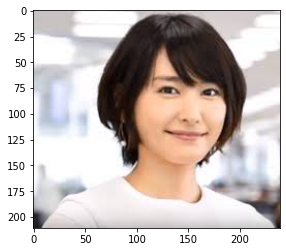

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import face_recognition
img = face_recognition.load_image_file("結衣.jfif")
en = face_recognition.face_encodings(img)[0]
print("結衣長這樣:", en)
plt.imshow(img)

In [13]:
import glob

sub = ["jfif", "jpg", "png", "jpeg"]
fn_list = []
for s in sub:
    fn_list = fn_list + glob.glob("*.{}".format(s))
encodings, names = [], []
for fn in fn_list:
    img = face_recognition.load_image_file(fn)
    en = face_recognition.face_encodings(img)[0]
    encodings.append(en)
    n = fn.split(".")[0]
    names.append(n)
print(names)
print(encodings)

['結衣', '阿信', '韓國瑜', '英文']
[array([-0.11871806,  0.08895587,  0.03081574, -0.05759809, -0.17234237,
        0.01303162, -0.08795334, -0.05214896,  0.14785978, -0.14611185,
        0.1809181 , -0.0811779 , -0.21694501, -0.00995512, -0.05358708,
        0.22342917, -0.17742431, -0.21617895, -0.01101371,  0.01965623,
        0.06497414,  0.04884245, -0.03296424,  0.01557688, -0.13503981,
       -0.34410459, -0.08365456, -0.01749294, -0.04925766, -0.05974016,
       -0.03939342,  0.06534347, -0.1694078 ,  0.00273443,  0.09510457,
        0.13980663, -0.00640149, -0.10996169,  0.11728266, -0.03646653,
       -0.33691105,  0.03474554,  0.1067851 ,  0.22308409,  0.1727621 ,
       -0.00730357, -0.04260437, -0.14155892,  0.13114557, -0.17051135,
        0.05163314,  0.16024536,  0.09868652,  0.05714351,  0.03427528,
       -0.13911743,  0.0134485 ,  0.12450286, -0.10232828, -0.04749877,
        0.08061841, -0.03871644,  0.04755296, -0.15690231,  0.1460149 ,
        0.06327902, -0.10858482, -0.2

網址:https://pgw.udn.com.tw/gw/photo.php?u=https://uc.udn.com.tw/photo/2019/04/07/1/6144959.jpg&s=Y&x=0&y=8&sw=1280&sh=852


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


跟 結衣 的距離是: 0.7095260853088089
跟 阿信 的距離是: 0.7375792430756274
跟 韓國瑜 的距離是: 0.7945621467938279
跟 英文 的距離是: 0.6794699212841547
這個最像: 英文
跟 結衣 的距離是: 0.5737029205799951
跟 阿信 的距離是: 0.4284164182561003
跟 韓國瑜 的距離是: 0.5629928328874662
跟 英文 的距離是: 0.555531635710401
這個最像: 阿信


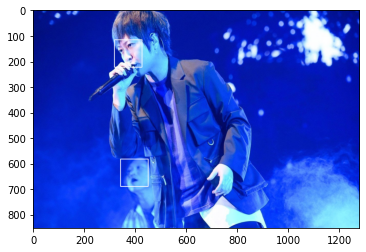

In [23]:
import requests
import cv2
url = input("網址:")
response = requests.get(url, stream=True, verify=False)
img = face_recognition.load_image_file(response.raw)
ens = face_recognition.face_encodings(img)
locs = face_recognition.face_locations(img)
for (top, right, bottom, left), en in zip(locs, ens):
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), 2)
    distances = face_recognition.face_distance(en, encodings)
    for d, n in zip(distances, names):
        print("跟", n, "的距離是:", d)
    mind = names[distances.argmin()]
    print("這個最像:", mind)
plt.imshow(img)